In [12]:
from datafetchingirta import DataFetcher
import bhutils as bh
import pandas as pd
import scipy.stats as ss

In [2]:
bh.bhDbAddServer("sql-snap-prod-cm")
ezbh = DataFetcher()

Getting Curves...
Getting Vols
Updating Pricing factory
Creating Risk Factory
Done


In [35]:
generator = 'JPY DYENCALM'
exp = '5Y'
tail = '2Y'
start_date = pd.Timestamp('2000-01-01')
end_date = pd.Timestamp('today')


distribution_df = ezbh.distribution_df(Generator=generator, EffExp=exp, MtyTnr=tail,)
distribution = ezbh.create_distribution(Generator=generator, EffExp=exp, MtyTnr=tail,)
moments = ezbh.distribution_moments(Generator=generator, EffExp=exp, MtyTnr=tail,)

In [36]:
rate_hist = ezbh.bulk_download2(
    generator=generator,
    rates=[(exp, tail)],
    metric='Strike',
    start_date=start_date,
    end_date=end_date,
)

array([-0.51827363])

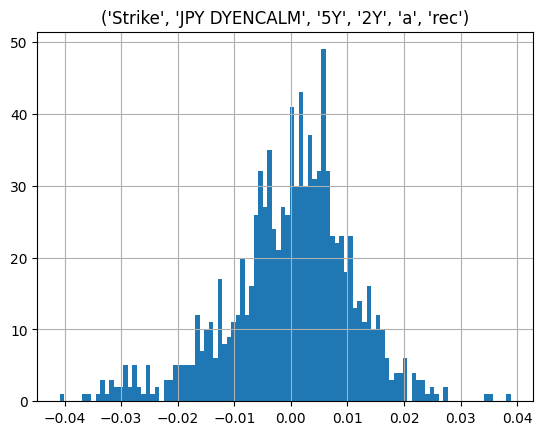

In [44]:
rate_change = rate_hist.diff(21).dropna().tail(1000) * (5 * 12) ** .5
rate_change = rate_change - rate_change.mean()
rate_change.hist(bins = 100, )
ss.skew(rate_change)

<Axes: xlabel='Date'>

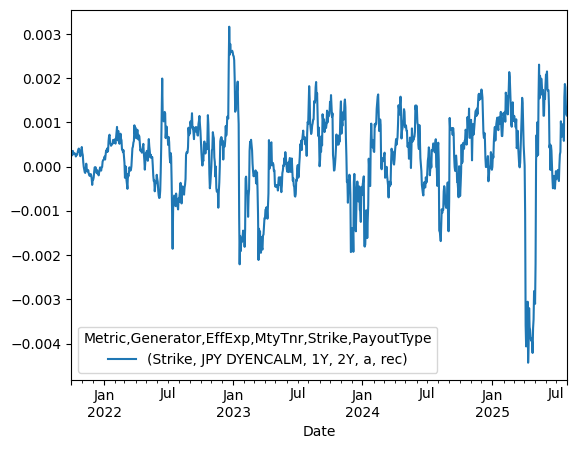

In [25]:
(rate_hist.diff(21) - rate_hist.diff(21).mean()).tail(1000).loc[:'2025'].plot()

In [5]:
distribution.rvs(size = 1000)

array([-3.84961911e+00, -3.59059086e-01,  1.59161612e+00,  3.72244602e+01,
       -1.55273338e+00,  2.78783996e+01,  1.75532295e+01, -7.86631029e+01,
        1.05813583e+02, -6.84848426e+01,  6.10163888e+01, -1.43242575e+01,
       -4.20762133e+01,  5.32713922e+01, -1.78902062e+01,  1.29330930e+01,
       -5.40148413e+00, -2.57117495e+01, -3.83694485e+01, -5.17849909e+00,
       -3.75819390e+01, -1.38329992e+01, -3.69099594e+01,  8.09096916e+01,
       -4.24925868e+01, -1.97012290e+01,  8.80809284e+01, -6.87324604e+01,
        6.51726685e+01,  9.75621155e+01,  2.22433606e+02, -4.92310736e+01,
       -3.98886442e+01, -1.13482419e+01,  1.96659204e+01, -3.38044374e+01,
       -3.79166711e+01, -5.59014326e+01, -5.57219699e+00, -3.85971828e+01,
        5.95484474e+01,  5.45216189e+01, -1.97337504e+01,  1.05256568e+02,
       -1.84475433e+01, -1.88004733e+01,  1.00947627e+01, -7.05814698e+01,
        1.57367105e+01,  5.42974156e+01,  5.84009742e+00,  7.31379640e+01,
       -9.37046956e+01, -

In [7]:
distribution_df

,strike_str,strike_relative,strike_float,vol,price_bps,cdf
0,a-400,-400,-254.580807,NaN,NaN,NaN
1,a-390,-390,-244.580807,NaN,NaN,NaN
2,a-380,-380,-234.580807,NaN,NaN,NaN
3,a-370,-370,-224.580807,NaN,NaN,NaN
4,a-360,-360,-214.580807,NaN,NaN,NaN
...,...,...,...,...,...,...
76,a+360,360,505.419193,98.314334,364.314424,0.999875
77,a+370,370,515.419193,99.688643,374.141656,0.999897
78,a+380,380,525.419193,101.058844,383.978581,0.999915
79,a+390,390,535.419193,102.424988,393.824504,0.999930
